In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv('./res/df_inne_choosen_entropy')
print(df.columns)
X=df.drop(['Moda'],axis=1)
y=df['Moda']
scaler=MinMaxScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
print(X.columns)
X=pd.DataFrame(X_scaled,columns=X.columns)

Index(['Moda', 'Muzyka__Rock', 'Miasto__Poznan', 'Zajecie__Sport',
       'Media_u__TikTok', 'Paznokcie__nie', 'Wakacje__Praca',
       'Wartosc__Kariera', 'Napoj__woda'],
      dtype='object')
Index(['Muzyka__Rock', 'Miasto__Poznan', 'Zajecie__Sport', 'Media_u__TikTok',
       'Paznokcie__nie', 'Wakacje__Praca', 'Wartosc__Kariera', 'Napoj__woda'],
      dtype='object')


In [194]:
print(X['Wzrost'].value_counts)

KeyError: 'Wzrost'

In [201]:
tree=DecisionTreeClassifier()
param_grid={
    'min_samples_leaf':list(range(1,5,1)),
    'max_depth':list(range(1,22,1)),
    'criterion':['gini','entropy'],
    'min_samples_split':list(range(1,7,1)),
    'min_impurity_decrease':[float(x)for x in np.linspace(0,0.1,10)],
    'class_weight':['balanced']
}


In [202]:
searcher=GridSearchCV(estimator=tree,param_grid=param_grid,cv=5,scoring='f1_weighted',n_jobs=5)
searcher.fit(X,y)

print(f"Najlepsze hiperparametry: {searcher.best_params_}")
print(f"Najlepszy wynik: {searcher.best_score_}")


Najlepsze hiperparametry: {'criterion': 'entropy', 'max_depth': 14, 'min_impurity_decrease': 0.03333333333333333, 'min_samples_leaf': 1, 'min_samples_split': 2}
Najlepszy wynik: 0.7046349206349206


/home/mysza/pythonProject/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
8400 fits failed out of a total of 50400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8400 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mysza/pythonProject/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mysza/pythonProject/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/mysza/pythonProject/.venv/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    vali

In [235]:
from sklearn.model_selection import cross_val_score
cv_tree=DecisionTreeClassifier(** {'criterion': 'gini', 'max_depth': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 3}
,random_state=5)
scores=cross_val_score(cv_tree,X,y,cv=5,scoring='f1_weighted')
    print(f"Wyniki cross-validation: {scores}")
    print(f"Średnia f1: {scores.mean()}")


Wyniki cross-validation: [0.84444444 0.46666667 0.66666667 0.65555556 0.72      ]
Średnia f1: 0.6706666666666667


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
testing_tree=DecisionTreeClassifier(**  {'criterion': 'gini', 'max_depth': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3}


,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
testing_tree.fit(X_train,y_train)
y_predict=testing_tree.predict(X_test)
print(f1_score(y_test,y_predict,average='weighted'))
#print(y_test)
#print(confusion_matrix(y_test,y_predict))
#print("X_train: ",X_train)
print("Y_train: ",y_train)
#print("X_test: ",X_test)
print("y_test: ",y_test)
print("y_predict: ", y_predict)
print("y_train_predict")
print("macierz pomylek w testowym: ",confusion_matrix(y_test,y_predict))
print("macierz pomylek w treninggowym: ", confusion_matrix(y_train,testing_tree.predict(X_train)))

0.7777777777777778
Y_train:  18    1
27    0
24    2
23    1
21    2
5     2
25    0
19    1
14    0
17    1
6     2
16    1
8     0
0     0
2     0
7     2
22    2
11    1
20    2
9     0
15    1
26    0
3     0
Name: Moda, dtype: int64
y_test:  13    0
4     0
1     2
10    1
28    0
12    0
Name: Moda, dtype: int64
y_predict:  [0 0 1 1 0 0]
y_train_predict
macierz pomylek w testowym:  [[4 0 0]
 [0 1 0]
 [0 1 0]]
macierz pomylek w treninggowym:  [[9 0 0]
 [2 5 0]
 [1 1 5]]


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
print(y_test)

13    0
3     0
23    1
6     2
18    1
25    0
Name: Moda, dtype: int64


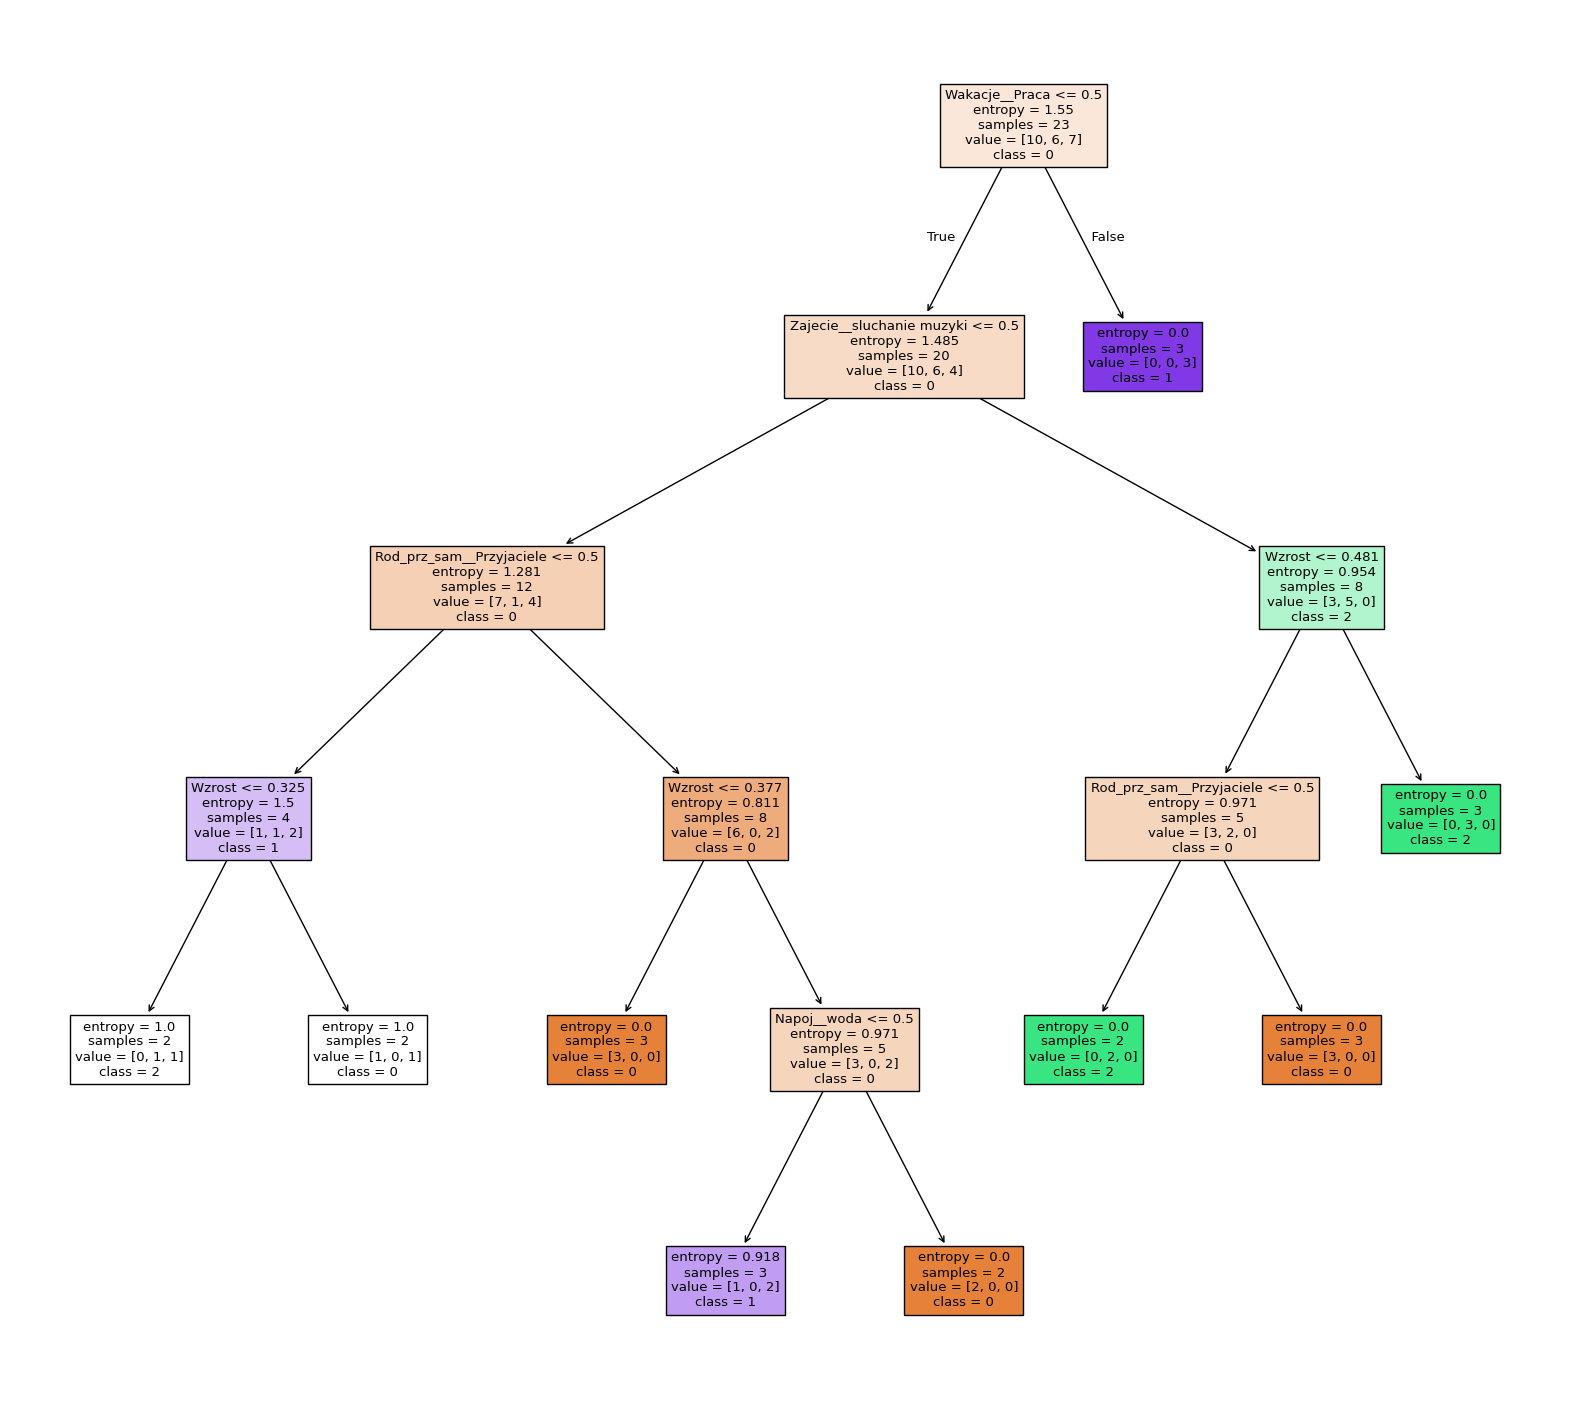

In [230]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 18))
targe_values=df['Moda'].unique()

plot_tree(testing_tree, filled=True, feature_names=X.columns, class_names=[str(int(x)) for x in targe_values])
plt.show()

Y


<function matplotlib.pyplot.show(close=None, block=None)>

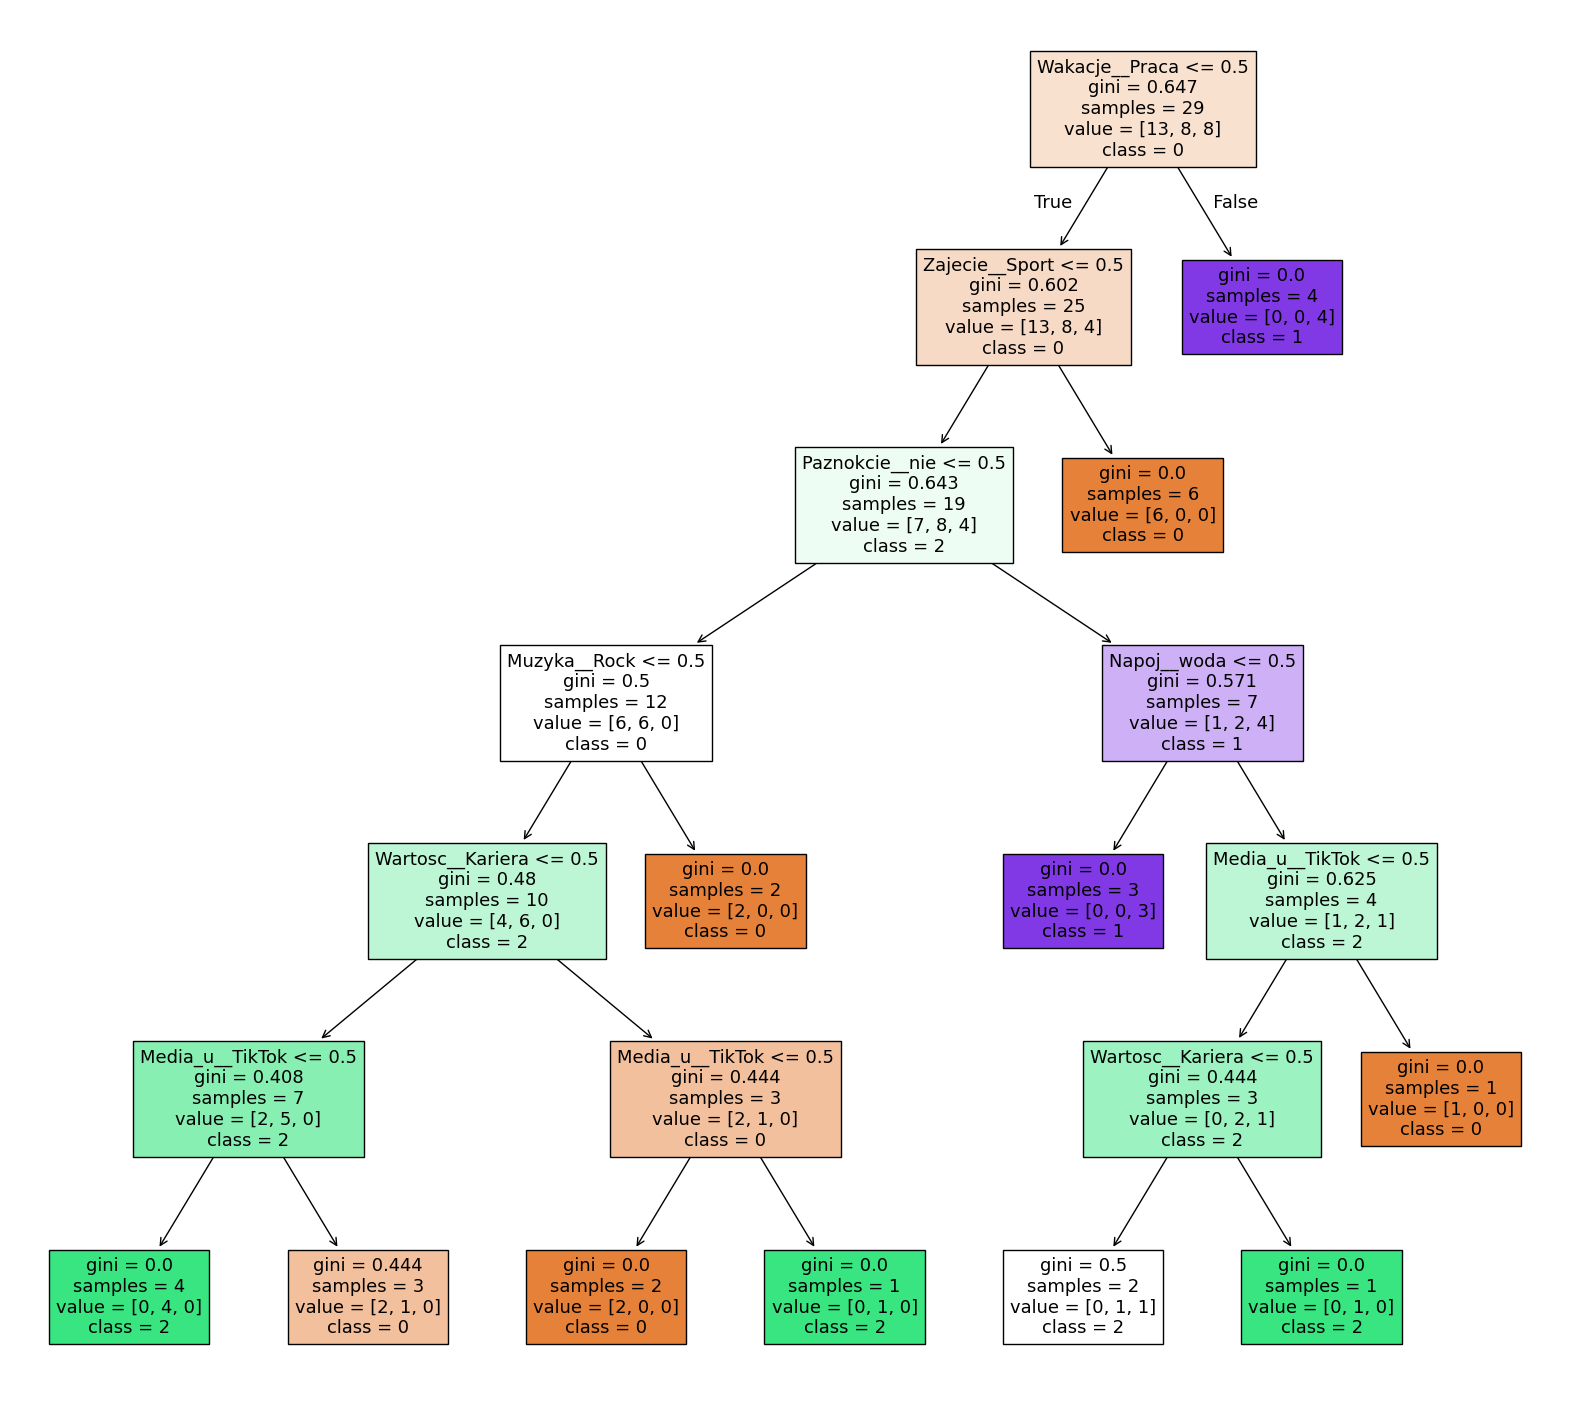

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
final_tree=DecisionTreeClassifier(**{'criterion': 'gini', 'max_depth': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3}
)
final_tree.fit(X,y)
targe_values=df['Moda'].unique()

plt.figure(figsize=(20, 18))
print("Y")
plot_tree(final_tree,filled=True,feature_names=X.columns,class_names=[str(int(x)) for x in targe_values])
plt.show

In [8]:
from joblib import dump
dump(final_tree,'ostateczne_drzewo_decyzyjne.joblib')
#dump(testing_tree,'normalized_testing_Decision_tree_gini_data_entropy_param.joblib')

['ostateczne_drzewo_decyzyjne.joblib']

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,matthews_corrcoef
cv_tree=DecisionTreeClassifier(** {'criterion': 'gini', 'max_depth': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 3}
,random_state=5)
scores=cross_val_score(cv_tree,X,y,cv=5,scoring=make_scorer(matthews_corrcoef))
print(f"Wyniki cross-validation: {scores}")
print(f"Średnia f1: {scores.mean()}")


Wyniki cross-validation: [0.78334945 0.15075567 0.45454545 0.52223297 0.72168784]
Średnia f1: 0.5265142765978206


In [ ]:
metrics=['precision','recall','f1_weighted',make_scorer(matthews_corrcoef)]